<a href="https://colab.research.google.com/github/nguyenhuuduong20062002/NguyenHuuDuong20104025/blob/main/Trai_cay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Fruit/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/BTVN/Fruit/'
/content


In [32]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [33]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Trai_cay/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 767 images belonging to 10 classes.


In [34]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Trai_cay/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 161 images belonging to 10 classes.


In [35]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Avacado-Bo': 0,
 'Banana-Chuoi': 1,
 'Kiwi': 2,
 'Limes-Chanh': 3,
 'Mango-Xoai': 4,
 'Passion fruit-Chanh day': 5,
 'Peach-Dao': 6,
 'Pineapple-Thom': 7,
 'Pomegranate-Luu': 8,
 'Watermelon-Dua hau': 9}

In [36]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Avacado-Bo': 0,
 'Banana-Chuoi': 1,
 'Kiwi': 2,
 'Limes-Chanh': 3,
 'Mango-Xoai': 4,
 'Passion fruit-Chanh day': 5,
 'Peach-Dao': 6,
 'Pineapple-Thom': 7,
 'Pomegranate-Luu': 8,
 'Watermelon-Dua hau': 9}

In [37]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [39]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/500
24/24 [==============================] - 172s 7s/step - loss: 2.0470 - accuracy: 0.2099 - val_loss: 1.8856 - val_accuracy: 0.2547
Epoch 2/500
24/24 [==============================] - 153s 6s/step - loss: 1.4198 - accuracy: 0.4446 - val_loss: 1.4645 - val_accuracy: 0.4099
Epoch 3/500
24/24 [==============================] - 170s 7s/step - loss: 1.2363 - accuracy: 0.5059 - val_loss: 1.0628 - val_accuracy: 0.5404
Epoch 4/500
24/24 [==============================] - 159s 7s/step - loss: 0.8891 - accuracy: 0.6102 - val_loss: 0.9538 - val_accuracy: 0.6584
Epoch 5/500
24/24 [==============================] - 155s 6s/step - loss: 0.7231 - accuracy: 0.7053 - val_loss: 0.6983 - val_accuracy: 0.7702
Epoch 6/500
24/24 [==============================] - 155s 6s/step - loss: 0.7734 - accuracy: 0.7353 - val_loss: 0.7377 - val_accuracy: 0.7391
Epoch 7/500
24/24 [==============================] - 155s 6s/step - loss: 0.5975 - accuracy: 0.8110 - val_loss: 0.5969 - val_accuracy: 0.8385
Epoch 

In [40]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.013171560131013393
Train Accuracy 0.9960886836051941


<function matplotlib.pyplot.show(*args, **kw)>

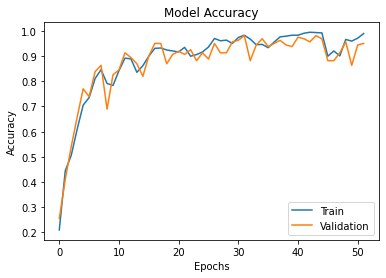

In [41]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [42]:
# Lưu lại
model.save("Fruit.h5")

In [43]:
# Tải mô hình 
model_CNN=load_model('Fruit.h5')

1/1 [==============================] - 0s 310ms/step
THOM


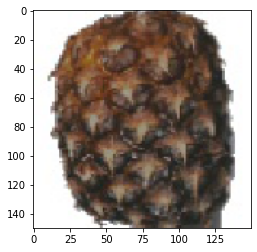

1/1 [==============================] - 0s 129ms/step
XOAI


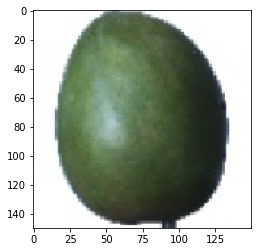

1/1 [==============================] - 0s 143ms/step
KIWI


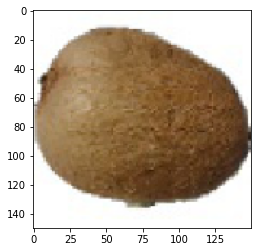

1/1 [==============================] - 0s 75ms/step
KIWI


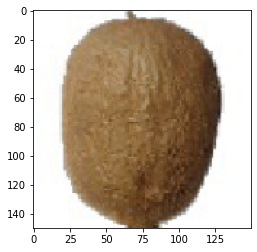

1/1 [==============================] - 0s 73ms/step
LUU


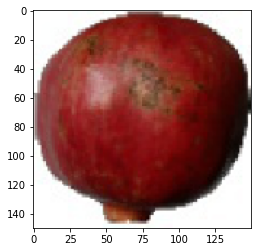

1/1 [==============================] - 0s 81ms/step
THOM


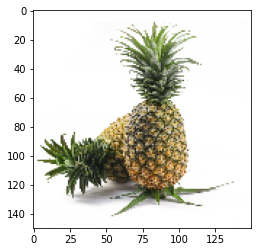

1/1 [==============================] - 0s 132ms/step
XOAI


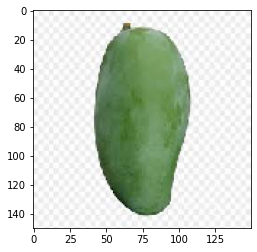

1/1 [==============================] - 0s 130ms/step
CHANH DAY


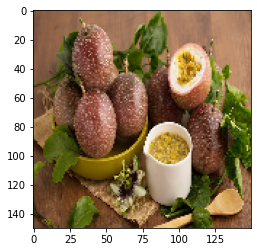

In [45]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Trai_cay/Test/Test1"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BO'
  if round(result[0][1])==1:
    prediction='CHUOI'
  if round(result[0][2])==1:
    prediction='KIWI'
  if round(result[0][3])==1:
    prediction='CHANH'
  if round(result[0][4])==1:
    prediction='XOAI'
  if round(result[0][5])==1:
    prediction='CHANH DAY'
  if round(result[0][6])==1:
    prediction='DAO'
  if round(result[0][7])==1:
    prediction='THOM'
  if round(result[0][8])==1:
    prediction='LUU'
  if round(result[0][9])==1:
    prediction='DUA HAU'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 80ms/step
DUA HAU


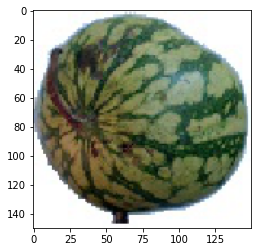

1/1 [==============================] - 0s 69ms/step
DUA HAU


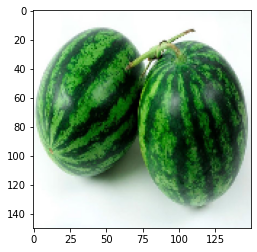

1/1 [==============================] - 0s 79ms/step
CHANH


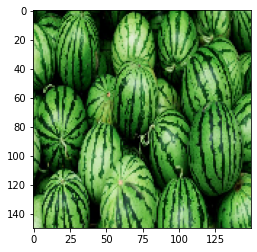

1/1 [==============================] - 0s 163ms/step
DAO


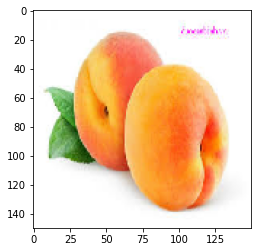

1/1 [==============================] - 0s 240ms/step
DAO


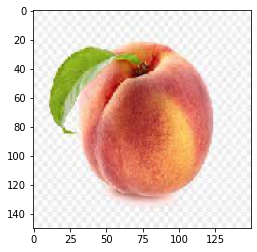

1/1 [==============================] - 0s 70ms/step
CHUOI


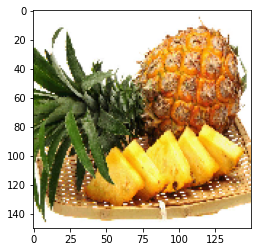

1/1 [==============================] - 0s 80ms/step
CHUOI


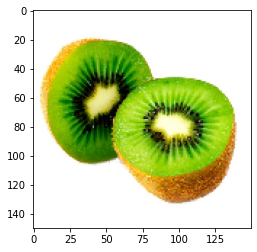

1/1 [==============================] - 0s 69ms/step
BO


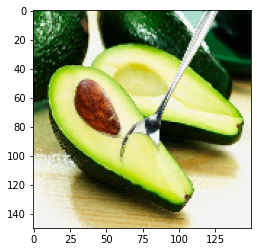

In [46]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Trai_cay/Test/Test2"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BO'
  if round(result[0][1])==1:
    prediction='CHUOI'
  if round(result[0][2])==1:
    prediction='KIWI'
  if round(result[0][3])==1:
    prediction='CHANH'
  if round(result[0][4])==1:
    prediction='XOAI'
  if round(result[0][5])==1:
    prediction='CHANH DAY'
  if round(result[0][6])==1:
    prediction='DAO'
  if round(result[0][7])==1:
    prediction='THOM'
  if round(result[0][8])==1:
    prediction='LUU'
  if round(result[0][9])==1:
    prediction='DUA HAU'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 71ms/step
CHANH


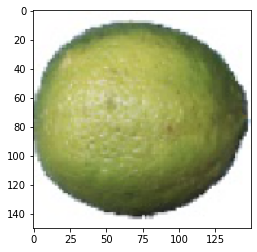

1/1 [==============================] - 0s 71ms/step
CHUOI


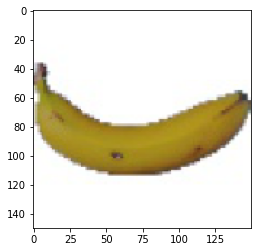

1/1 [==============================] - 0s 73ms/step
CHANH DAY


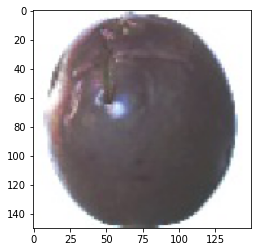

1/1 [==============================] - 0s 133ms/step
DAO


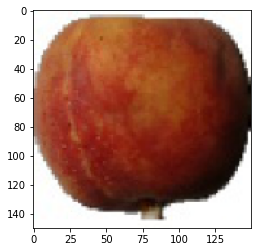

1/1 [==============================] - 0s 114ms/step
CHUOI


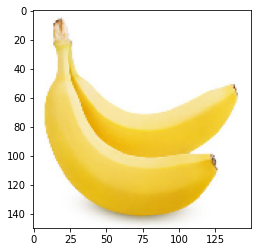

1/1 [==============================] - 0s 70ms/step
CHANH


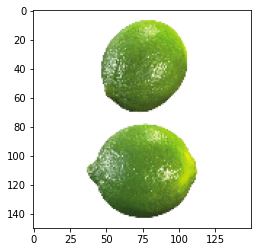

1/1 [==============================] - 0s 70ms/step
CHANH


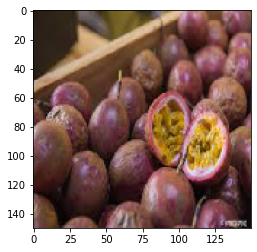

1/1 [==============================] - 0s 70ms/step
CHANH


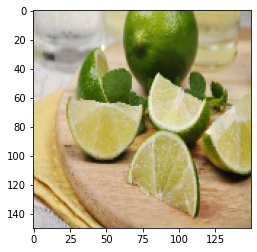

In [47]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Trai_cay/Test/Test3"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BO'
  if round(result[0][1])==1:
    prediction='CHUOI'
  if round(result[0][2])==1:
    prediction='KIWI'
  if round(result[0][3])==1:
    prediction='CHANH'
  if round(result[0][4])==1:
    prediction='XOAI'
  if round(result[0][5])==1:
    prediction='CHANH DAY'
  if round(result[0][6])==1:
    prediction='DAO'
  if round(result[0][7])==1:
    prediction='THOM'
  if round(result[0][8])==1:
    prediction='LUU'
  if round(result[0][9])==1:
    prediction='DUA HAU'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 69ms/step
BO


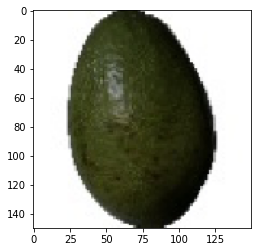

1/1 [==============================] - 0s 74ms/step
LUU


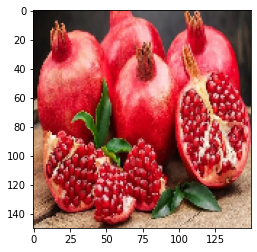

In [48]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Trai_cay/Test/Test4"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BO'
  if round(result[0][1])==1:
    prediction='CHUOI'
  if round(result[0][2])==1:
    prediction='KIWI'
  if round(result[0][3])==1:
    prediction='CHANH'
  if round(result[0][4])==1:
    prediction='XOAI'
  if round(result[0][5])==1:
    prediction='CHANH DAY'
  if round(result[0][6])==1:
    prediction='DAO'
  if round(result[0][7])==1:
    prediction='THOM'
  if round(result[0][8])==1:
    prediction='LUU'
  if round(result[0][9])==1:
    prediction='DUA HAU'
  print(prediction)
  plt.show()